# Grade: /100 pts

# Assignment 06: Feature Selection and Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

# You're Still a Data Scientist!

Your models from the last assignment really impressed some in the management in your football club. Now that you have learned the art of regularization, your boss thinks you should do equally well with much less data. This will save a lot of money the next time around. This time you only get a data set with 3000 observations.

## Question 1: Preprocessing (5 pts)
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**. If you want to understand why this is, have a look at the Jupyter notebook (`Ridge_And_Dummycoding.ipynb`).  
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0
* visualize all variables of the first 50 observations of the Training data set as an image (see Lab06_followalong). You can also look at it as a data frame. How are the different variables scaled? Which variables have high and which ones have low values?    

To make sure that you get a good start - check the solutions from Assignment 4. And make sure you can apply these steps flexibly and quickly. **You will need it for the midterm!**

      age  height_cm  weight_kg  pac  sho  pas  dri  def  phy  \
2858   20      178.0       69.0   61   38   52   54   62   71   
723    21      182.0       77.0   80   66   64   76   49   64   
1953   25      187.0       76.0   73   78   65   77   43   73   
1981   21      175.0       77.0   89   72   66   78   33   63   
137    19      168.0       59.0   69   53   59   68   44   48   
1825   24      174.0       64.0   84   55   55   70   36   62   
1313   26      182.0       84.0   60   55   59   59   63   73   
1455   21      178.0       70.0   73   61   50   62   25   51   
672    23      187.0       75.0   63   61   57   63   40   61   
1724   30      189.0       87.0   59   56   55   57   41   58   
527    23      196.0       74.0   57   35   52   49   61   75   
491    33      182.0       78.0   67   63   57   64   47   58   
1633   28      185.0       82.0   54   36   48   55   63   72   
1281   28      170.0       70.0   67   56   59   63   58   61   
349    17      180.0     

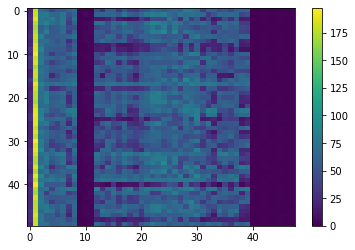

In [2]:
# Your answer here
df=pd.read_csv("footballer_small.csv")
df=df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'],axis="columns")
df=pd.get_dummies(df,columns=["work_rate_att","work_rate_def","preferred_foot"],drop_first=False)
X=df.drop("overall",axis="columns")
y=df.overall
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 500,random_state=0)

print(Xtrain.head(50))

x=Xtrain.values


plt.imshow(x[0:50,:],aspect='auto')

plt.colorbar()
plt.show()

**Your written answer here**
Variables are scaled differently. international_reputation,skill_moves,weak_foot,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right have low values. Other variables have high values.

## Question 2: Standardization  (10 pts)
When using regularized regression models, the scaling of the different regressors can influence the results dramatically (see lectures). One simple solution is to standardize all features before estimating the model, so that no feature can dominate others due to differences in feature scales. 

a) Use the sklearn class `StandardScaler` to produce a z-scale version of your training data set. Again visualize the the first 50 observations an image. Compare to the plot that you got in Question 1. What do you observe? 

b) Plot a histogram of the second column (height_cm) of the non-standarized and standardized training set. What is the mean and variance of the standardized training set. 

c) Build a model `pipeline` that first standarizes all the features in the training set and then fits a `LinearRegression` model. 


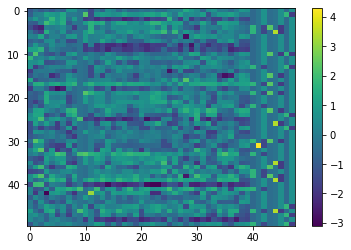

In [3]:
# Part a answer
scaler = sk.preprocessing.StandardScaler(with_mean=True, with_std=True)
standardXtrain = scaler.fit_transform(Xtrain)


plt.imshow(standardXtrain[0:50,:],aspect='auto')

plt.colorbar()
plt.show()



**Written answer here**
For plot in question 1, the colors of observations for each variable are quite different so each variable's scale is different. Some variables such as height_cm have higher values in comparison to other variables. For plot in question 2, the colors of observations for each variable is similar. After standardization, the observations for each variable have similar scale.

mean is -1.5546675058430992e-15
variance is 1.0


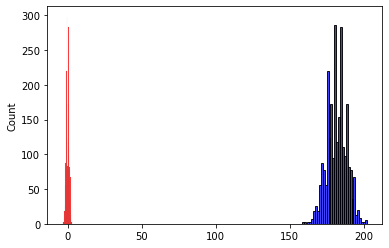

In [4]:
# b) Plot historgram 
sns.histplot(x[:,1],color="b")  # non-standardized training set
sns.histplot(standardXtrain[:,1],color="r") #standardized training set
print("mean is",standardXtrain[:,1].mean())
print("variance is",standardXtrain[:,1].var())

**Written answer here**
the mean is -1.5546675058430992e-15, which is very close to 0. the variance is 1.

In [5]:
# c: Build pipeline
model = Pipeline([
    ('standard',sk.preprocessing.StandardScaler(with_mean=True, with_std=True)),
    ('linear_regression', sk.linear_model.LinearRegression())
])

## Question 3: Comparing different complex features (10 pts)
In this task, we will first consider a model that includes all the variables in the data AND all quadratic terms (i.e. each features to the power of two, and the products (interactions) between all possible pairs of features. 

a) Generate a design matrix for the model. You can use sklearn's `PolynomialFeatures` to do the job. Because sklearn's linear models have the option to fit the intercept, internally, set the `include_bias` option to `False`. 
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

b) Now generate 3 more models / design matrices. Again it should include all quadratic terms and 2-way interactions - but each model should drop one of the features
* Second Model: Drop `standing_tackle`
* Third Model: Drop `composure`
* Fourth model: Drop `marking`

Hint: For these models, create the design matrix without the aforementioned features and then apply polynomial expansion to the remaing features. 


In [6]:
# a) Make the new expanded design matrix 
poly = sk.preprocessing.PolynomialFeatures(2,include_bias=False)
X = poly.fit_transform(Xtrain)
Xtrain.shape


(2500, 48)

**Written answer here**
This new feature set has 48 linear terms, and 48 squared terms, and 1128 interaction terms. One example of the intercation term is age x height_cm.

In [7]:
# Make design matrices without one of the features
secondX=Xtrain.drop("standing_tackle",axis="columns")
thirdX=Xtrain.drop("composure",axis="columns")
fourthX=Xtrain.drop("marking",axis="columns")

secondX=poly.fit_transform(secondX)
thirdX=poly.fit_transform(thirdX)
fourthX=poly.fit_transform(fourthX)



## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the models in question 3. Use 10-fold cross validation to report the validation error on the models using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. For this first step in the backwards search, which feature would you drop? 

In [8]:
# Your code here
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

def mse(y,ypred):
    return np.mean((y-ypred)**2)

kf = KFold(n_splits=10,shuffle=True)
sc = make_scorer(mse)

cv_scores = cross_val_score(model, X, ytrain, cv=kf, scoring=sc)
print(f"CV loss for first model: {cv_scores.mean()}")
cv_scores = cross_val_score(model, secondX, ytrain, cv=kf, scoring=sc)
print(f"CV loss for second model: {cv_scores.mean()}")
cv_scores = cross_val_score(model, thirdX, ytrain, cv=kf, scoring=sc)
print(f"CV loss for third model: {cv_scores.mean()}")
cv_scores= cross_val_score(model, fourthX, ytrain, cv=kf, scoring=sc)
print(f"CV loss for fourth model: {cv_scores.mean()}")

CV loss for first model: 3.0320327653656336
CV loss for second model: 2.869863639281111
CV loss for third model: 2.672445637669814
CV loss for fourth model: 2.7821188447498186


**Written answer here**  
I would drop standing_tackle, because dropping it gives the lowest validation error.

## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The ridge parameter ($\lambda$ or `alpha` in sklearn) should be set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [9]:
# Your code here

ridgemodel = Pipeline([
    ('standard',sk.preprocessing.StandardScaler(with_mean=True, with_std=True)),
    ('ridge_regression', Ridge(alpha=0.5,fit_intercept=False))
])

cv_scores = cross_val_score(ridgemodel, X, ytrain, cv=kf, scoring=sc)
print(f"CV loss for first model: {cv_scores.mean()}")

CV loss for first model: 4381.561661256254


## Question 6: Tune the Ridge coefficient for the 2nd-order model (15 pts)
Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. 

For each setting of lambda, calculate the training error when fitting the regularized model to the entire trainign data set, and the prediction error by studying the performance on the left-out part using 10-fold cross-validation. (*Note this calculation can take a bit, be patient*)

Plot the mean squared training error and mean squared validation error as a function of $\log(\lambda)$. 

Note: Although you can ultimately use `GridSearchCV` from sklearn, in this task you need to program a for-loop interating over all the levels of $\lambda$.  

### Questions: 

What is the best regularization parameter? 

Why does the validation error increase as $\lambda \rightarrow 0$, while the training error decreases from the optimal value?  Why does both the training and the validation error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off and model complexity.


7.38905609893065

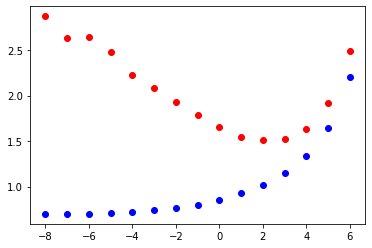

In [13]:
# Your code here
trainerror=np.zeros(15)
validationerror=np.zeros(15)
lam = np.exp(np.linspace(-8,6,15))
trainerror=np.zeros(15)
validationerror=np.zeros(15)

**Written answer here**
the best regularization parameter is exp(2)
As lambda approaches 0, the model does not penalize the magnitude of coefficients. As a result, the model becomes more overfitted to the training set. The model also becomes more complex. Then the training error would decrease but the validation error would increase(low bias but high variance). As lambda approaches inifnity, the model heavily penalize the magnitude of coefficients. Thus, the model becomes too simple, and it would not fit either the training set or validation set. Then the training error would increase and the validation error would also increase. Now the model has a high bias and high variance.

## Question 7: Test error  (10 pts)
Now fit the model using ridge regression, using the lambda-value that you determined works best (in terms of crossvalidated mse) from Question 6. Fit the model on the whole training set. 

Report the mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem (remember assignment 5). 

In [ ]:
# Your code here
def squarederror(y,ypred):
    return ((y-ypred)**2)


ridge=Ridge(alpha=np.exp(2))
ridge.fit(X,ytrain)

poly = sk.preprocessing.PolynomialFeatures(2,include_bias=False)
Xt = poly.fit_transform(Xtest)
Xt = scaler.fit_transform(Xt)

testloss = mean_squared_error(ytest,ridge.predict(Xt))
loss_ci = [testloss - 1.96*np.std(squarederror(ytest,ridge.predict(Xt)))/np.sqrt(ytest.shape[0]),testloss+1.96*np.std(squarederror(ytest,ridge.predict(Xt)))/np.sqrt(ytest.shape[0])]
print("mean squared error on the test data is",testloss)
print("95% confidence interval is",loss_ci)

## Question 8: Lasso Regression (10 pts)
That's great! You can achieve a really good prediction accuracy with much less data than in Week 5. Impressive! 

Now the problem is that the model is really hard to interpret and explain to clients- the importance of each feature is not easily apparent. So let's build a simpler model, which is only based on the first nine features:
* age
* height_cm
* weight_kg 
* pac: ???  
* sho: shooting 
* pas: passing 
* dri: dribble 
* def: defense
* phy: Physiological VO2 max

Build a design matrix using only these nine features. Standardize the design matrix using the standard scalar. 
Then use `sklearn.linear_model.lasso_path` to create a plot of the regression coefficients against the log-regularization parameter (see `Lab06_followalong`). Note that it is standard practice to plot on the x-axis the negative log-lambda values, such that the high regularization (and hence the simpler models) are on the left. 

Which of the 9 variables drops out of the predicitive model first? Which one is retained for the longest time? 

In [ ]:
# Make a new, reduced design matrix 
newXtrain=Xtrain.iloc[:,0:9]
newXtrain = scaler.fit_transform(newXtrain)
# Create a lasso path 
eps = 5e-3
lambda_lasso, coefs_lasso, _ = sk.linear_model.lasso_path(newXtrain,ytrain, eps, n_alphas=100, alphas= None, fit_intercept=False)
colors = ['b', 'r', 'g', 'c', 'k','m','y','tab:brown','tab:grey']
neg_log_lambda = -np.log(lambda_lasso)


# Plot the lasso path
for i in range(9):
    l1 = plt.plot(neg_log_lambda, coefs_lasso[i,], c=colors[i])



**Written answer here**
height_cm would drop out of the predictive model first. pas is reatined for the longest time.

## Question 9: Tuning the lasso coefficient 
We now want to find a model that is both simple (explainable), but at the same time yields still relatively decent predictions. To assess this, vary the regularization constant of the lasso model between exp(2) end exp(-3.5). That is, vary negative log lambda between -2 and 3.5 in even steps. 
Plot the crossvalidation error (mean squared error) against negative-log-lambda of the model. 

Hint: You can either program a for-loop as in Question 6, or use the function `GridSearchCV`. 

What is the simplest model that still gives you a expected validation error of below 15? 
If you wanted the best validation error, what $\lambda$ would you need to use?

In [ ]:
# Your code here
lam=np.exp(np.linspace(-3.5,2,20))
cverror=np.zeros(20)
for i in range(lam.size):
    
    cv_scores = cross_val_score(Lasso(alpha=lam[i]), newXtrain, ytrain, cv=kf, scoring=sc)
    cverror[i]=cv_scores.mean()

print(lam)
print(cverror)
plt.scatter(-np.log(lam),cverror)

**Written answer here**
The simplest model that still gives you a expected validation error of below 15 is the lasso model with the regularization coefficient,0.54593074.We should use 0.03019738 (exp(-3.5)) as lambda, if we want the best validation error.

## Question  10: Lasso vs. Ridge
In this quesiton, we will compare Ridge regression and Lasso solutions on the model defined in Question 8. Make sure you are using a standardized design matrix for this task. 

Fit the model using Ridge (L2- regularization, $\lambda = exp(-3)$) and Lasso (L1-regularization, $\lambda = exp(-0.5)$. Then print out the regression coefficients for each of the nine features in the design matrix. 

Based on the coefficients, which one is the most important feature in the Ridge vs. Lasso solution? How many features are contributing to the prediction for each solution? How can this difference be explained? 


In [ ]:
# Your code here
ridge=Ridge(alpha=np.exp(-3))
ridge.fit(newXtrain,ytrain)
print("ridge coefficients:",ridge.coef_)
lasso=Lasso(alpha=np.exp(-0.5))
lasso.fit(newXtrain,ytrain)
print("lasso coefficients:",lasso.coef_)

**Written answer here**
For Ridge solution, dri(dribble) is the most important feature. For Lasso solution, phy is the most important feature. For ridge solution, all features(9) are contributing to the prediction for each solution. For lasso solution, only 5 features are contributing to the prediction for each solution. This difference can be explained by the nature of Ridge and Lasso regressions. Ridge regression will always generate a model involving all features. Lasso regression uses L1 penalty, so Lasso can force some coefficient estimates to be exactly equal to 0. Therefore, some features in Lasso regression model will not contribute to the prediction for each solution.